In [36]:
# Dependencies 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import requests 
import time 
import scipy.stats as st 

# Import API Keys 
from api_keys import weather_api_key

# Import citipy to determine the cities based on lat and lon 
from citipy import citipy

# Import date to incorporate current date in plot titles 
from datetime import date


In [37]:
# Empty list - lat and lon combinations 
lat_lon = []

# Empty list - city names 
cities = []

# Rangee of lat and lon 
lat_range = (-90, 90)
lon_range = (-180, 180)

# Create a set of random lat and lon combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lon = np.random.uniform(lon_range[0], lon_range[1], size = 1500)
lat_lon = zip(lats, lon)

# Identify nearest city for each lat, lon combination 
for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    # If city is unique, add to cities list 
    if city not in cities:
        cities.append(city)

# Print city count to confirm sufficient count 
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


In [38]:
# API base URL 
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define empty list to fetch weather data for each city 
city_data = []

# Print to logger 
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1 
set_count = 1 

# Loop through all cities in our list to fetch weather data 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 0 

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log url, record, and set numbers 
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to record count
    record_count += 1 

    # Run an API request for each of the cities 
    try: 
        # Parse the JSON and retrieve data 
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lat,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        # If error, skip city 
    except:
        print("City not found. Skipping...")
        pass 
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | sassandra
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | magadan
Processing Record 8 of Set 1 | miarinarivo
City not found. Skipping...
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | skierniewice
Processing Record 11 of Set 1 | puerto santa
Processing Record 12 of Set 1 | canutama
Processing Record 13 of Set 1 | winnemucca
Processing Record 14 of Set 1 | freeport
Processing Record 15 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 16 of Set 1 | severo-yeniseyskiy
Processing Record 17 of Set 1 | campbell river
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | champerico
Pro

In [39]:
# Convert the cities weather data into a Pandas Dataframe 
city_data_df = pd.DataFrame(city_data)

# Show record count 
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [40]:
# Display sample data 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-43.9535,9.29,58,100,1.78,NZ,1691388354
1,cidreira,-30.1811,-30.1811,18.73,73,41,2.14,BR,1691388355
2,papatowai,-46.5619,-46.5619,5.11,90,100,6.91,NZ,1691388356
3,udachny,66.4167,66.4167,19.14,48,98,3.80,RU,1691388357
4,sassandra,4.9500,4.9500,23.31,93,96,1.93,CI,1691388357


In [41]:
# Export city_data into a csv 
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data 
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-43.9535,9.29,58,100,1.78,NZ,1691388354
1,cidreira,-30.1811,-30.1811,18.73,73,41,2.14,BR,1691388355
2,papatowai,-46.5619,-46.5619,5.11,90,100,6.91,NZ,1691388356
3,udachny,66.4167,66.4167,19.14,48,98,3.80,RU,1691388357
4,sassandra,4.9500,4.9500,23.31,93,96,1.93,CI,1691388357


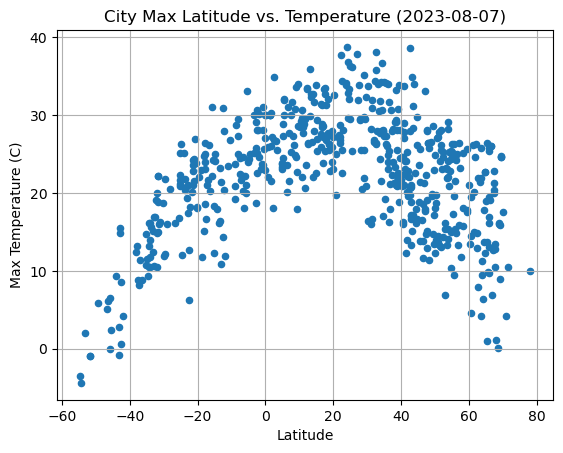

In [43]:
# Scatter Plot - Latitude vs Temperature 
today = date.today()

city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid = True)

plt.title(f"City Max Latitude vs. Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.savefig("output_data/Lat_Temp.png")

plt.show()

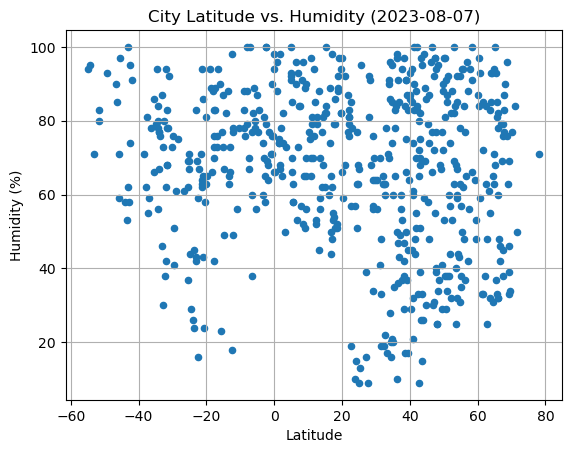

In [44]:
# Scatter Plot - Latitude vs Humidity 
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid = True)

plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Lat_Humidity.png")

plt.show()

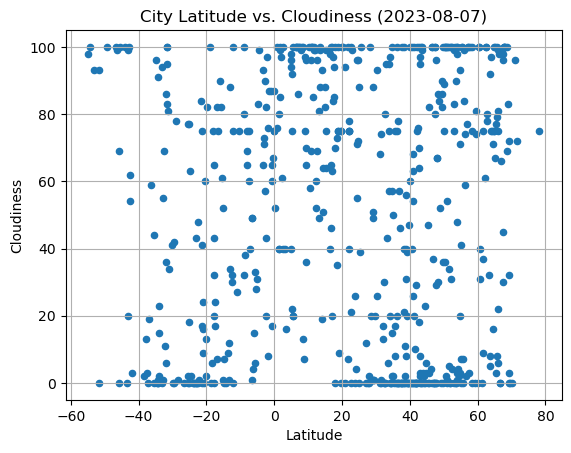

In [45]:
# Scatter Plot - Latitude vs Cloudiness 
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True)

plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("output_data/Lat_Cloudiness.png")

plt.show()

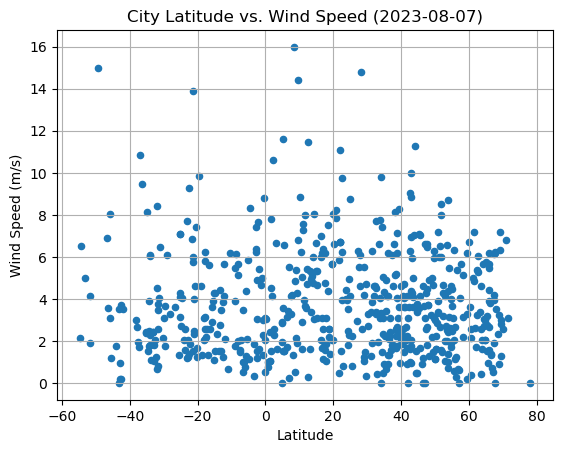

In [46]:
# Scatter Plot - Latitude vs Wind Speed 
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid = True)

plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.savefig("output_data/Lat_Wind_Speed")

plt.show()

In [47]:
# Define function to create Linear Regression plots 
def linear_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue **2}")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq, xy=(a,b), fontsize=12, color="blue")

In [48]:
# Dataframe with Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,udachny,66.4167,66.4167,19.14,48,98,3.80,RU,1691388357
4,sassandra,4.9500,4.9500,23.31,93,96,1.93,CI,1691388357
5,aykhal,66.0000,66.0000,19.42,32,99,4.40,RU,1691388358
6,magadan,59.5667,59.5667,17.52,53,81,0.21,RU,1691388325
8,skierniewice,51.9548,51.9548,13.06,74,100,8.00,PL,1691388361


In [49]:
# Dataframe with Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-43.9535,9.29,58,100,1.78,NZ,1691388354
1,cidreira,-30.1811,-30.1811,18.73,73,41,2.14,BR,1691388355
2,papatowai,-46.5619,-46.5619,5.11,90,100,6.91,NZ,1691388356
7,port elizabeth,-33.9180,-33.9180,13.97,77,15,1.79,ZA,1691388330
9,puerto santa,-8.9906,-8.9906,19.23,83,80,3.89,PE,1691388361


The r-value is: 0.32836704753538537


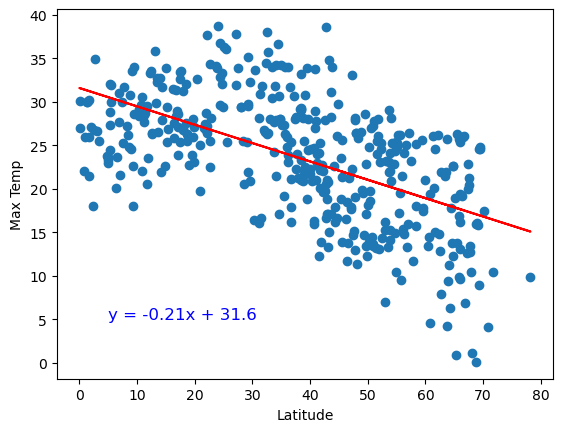

In [50]:
# Lin. Regression Northern Hemisphere - Lat vs Max Temp 
n_hemis_regress = linear_reg(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])
annotate(n_hemis_regress, 5, 5)
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.6582577001053523


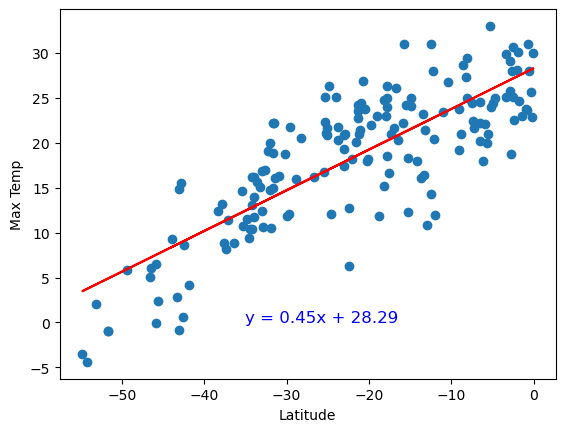

In [51]:
# Lin. Regression Southern Hemisphere - Lat vs Max Temp 
s_hemis_regress = linear_reg(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])
annotate(s_hemis_regress, -35, 0)
plt.ylabel("Max Temp")
plt.show()

# Linear Relationship 
The linear relationsip between the Max Temperature and Latitude in the Northern Hemisphere and Southern Hemisphere are similar as the

The r-value is: 0.01569970575742374


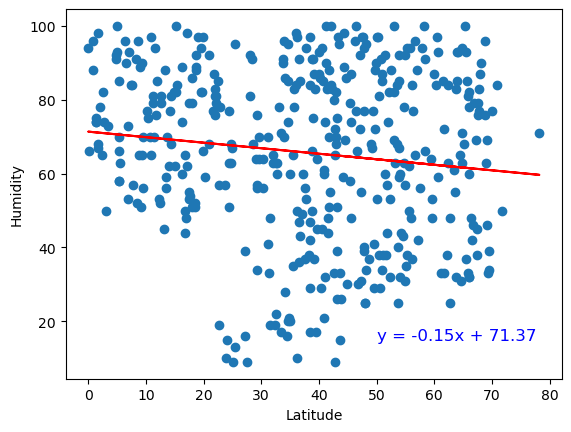

In [52]:
# Lin. Regression Northern Hemisphere - Lat vs Humidity 
n_hemis_hmdty = linear_reg(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])
annotate(n_hemis_hmdty, 50, 15)
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.0001786702535429323


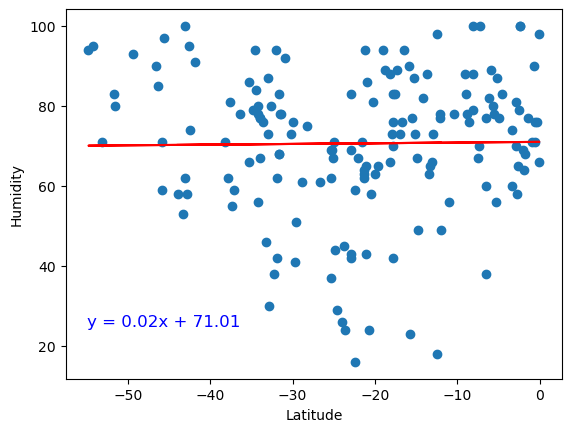

In [53]:
# Lin. Regression Southern Hemisphere - Lat vs Humidity 
s_hemis_hmdty = linear_reg(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])
annotate(s_hemis_hmdty, -55, 25)
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.02004587696901632


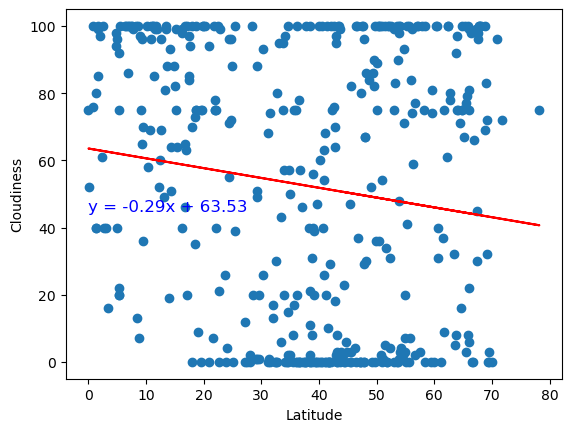

In [54]:
# Lin. Regression Northern Hemisphere - Lat vs Cloudiness 
n_hemis_cloud = linear_reg(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])
annotate(n_hemis_cloud, 0, 45)
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.000812053031041589


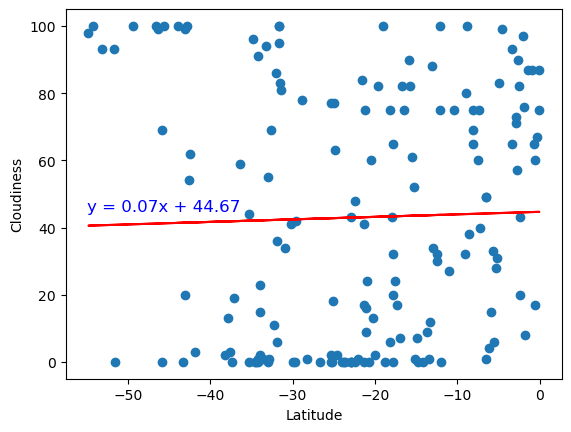

In [55]:
# Lin. Regression Southern Hemisphere - Lat vs Cloudiness 
s_hemis_cloud = linear_reg(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])
annotate(s_hemis_cloud, -55, 45)
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.01979261026091748


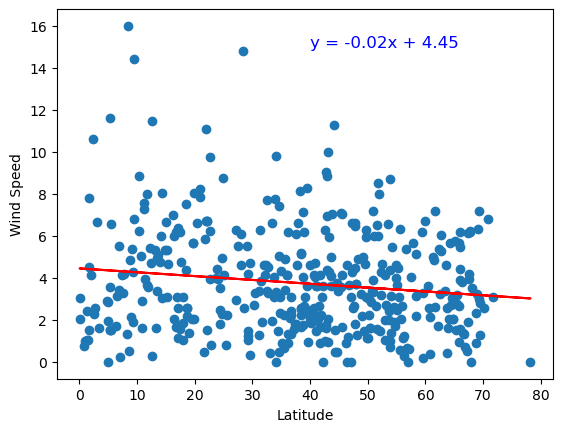

In [56]:
# Lin. Regression Northern Hemisphere - Lat vs Windspeed
n_hemis_wind = linear_reg(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
annotate(n_hemis_wind, 40, 15)
plt.ylabel("Wind Speed")
plt.show()

The r-value is: 0.002776138377978112


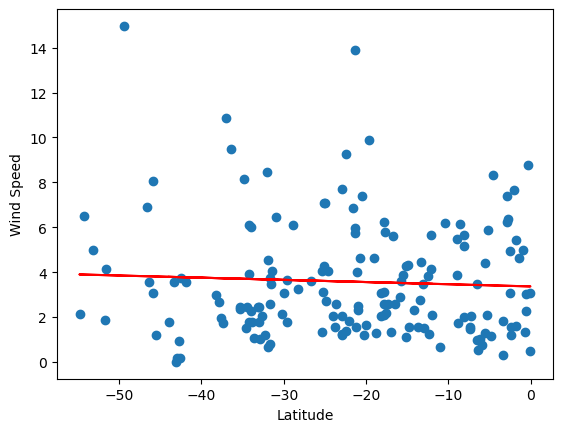

In [57]:
# Lin. Regression Southern Hemisphere - Lat vs Windspeed 
s_hemis_wind = linear_reg(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])
annotate(s_hemis_wind, 40, 15)
plt.ylabel("Wind Speed")
plt.show()